You are an analyst for a small company that develops house price models for auctioneers. To generate the data you use publicly available data such as list price, square footage, number of bedrooms, number of bathrooms. We are interested in another questions: Is the local secondary school excellent (the high rating) and how is that related to house prices?

Secondary school rating is not quantative it is qualitative (catergorical). For each home the secondary school is either excellent or not.

#### House Price

<table style=width:50%>
<tr>
    <th> Price 1000s (y) </th>
    <th> SQFT ($x_1$) </th>
    <th> Excellent ($x_2$) </th>
</tr>
<tr>
    <th>145</th>
    <th>1872</th>
    <th>0</th>
</tr>
<tr>
    <th>69.9</th>
    <th>1454</th>
    <th>0</th>
</tr>
<tr>
    <th>315</th>
    <th>4104</th>
    <th>1</th>
</tr>
<tr>
    <th>144.9</th>
    <th>1524</th>
    <th>0</th>
</tr>
<tr>
    <th>134.9</th>
    <th>1297</th>
    <th>0</th>
</tr>
<tr>
    <th>369</th>
    <th>3278</th>
    <th>1</th>
</tr>
<tr>
    <th>95</th>
    <th>1192</th>
    <th>0</th>
</tr>
<tr>
    <th>228.9</th>
    <th>2252</th>
    <th>1</th>
</tr>
<tr>
    <th>149</th>
    <th>1620</th>
    <th>0</th>
</tr>
<tr>
    <th>295</th>
    <th>2466</th>
    <th>1</th>
</tr>
<tr>
    <th>388.5</th>
    <th>3188</th>
    <th>1</th>
</tr>
<tr>
    <th>75</th>
    <th>1061</th>
    <th>0</th>
</tr>
<tr>
    <th>130</th>
    <th>1195</th>
    <th>0</th>
</tr>
<tr>
    <th>174</th>
    <th>1552</th>
    <th>1</th>
</tr>
<tr>
    <th>334.9</th>
    <th>2901</th>
    <th>1</th>
</tr>

In [7]:
import matplotlib.pyplot as plt
import numpy as np

In [8]:
prices = [145, 69.9, 315, 144.9, 134.9, 369, 95, 228.9, 149, 295, 388.5, 75, 130, 174, 334.9]
square_feet = [1872, 1954,4104,1524,1297,3278,1192,2252,1620,2466,3188,1061,1195,1552,2901]
excellent = [0,0,1,0,0,1,0,1,0,1,1,0,0,1,1]

In [9]:
legend_names = ["Not Excellent", "Excellent"]

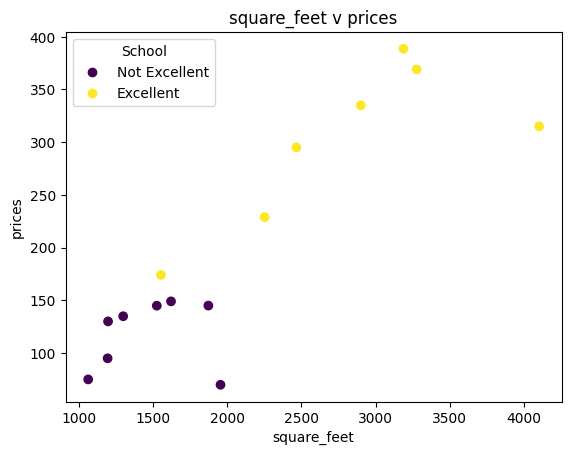

In [10]:
plt.title("square_feet v prices")
plt.xlabel("square_feet")
plt.ylabel("prices")
scatter = plt.scatter(square_feet,prices, c = excellent)
plt.legend(handles = scatter.legend_elements()[0], labels = legend_names, title = "School")

$E(y) = \beta_0 + \beta_1x_1 + \beta_2x_2$ 
* Y is house prices
* $\beta_1x$ = sqaure foot
* $\beta_2x$ = other variable

What about if the SS is excellent?

$ E(y) = \beta_0 + \beta_1x_1 +\beta_2*1$

$ E(y) = \beta_0 + \beta_2 + \beta_1x_1$

In [11]:
all_data = list(zip(square_feet, excellent))
print(all_data) 

[(1872, 0), (1954, 0), (4104, 1), (1524, 0), (1297, 0), (3278, 1), (1192, 0), (2252, 1), (1620, 0), (2466, 1), (3188, 1), (1061, 0), (1195, 0), (1552, 1), (2901, 1)]


In [12]:
import statsmodels.api as sm

all_data = sm.add_constant(all_data)
model = sm.OLS(prices, all_data)
results = model.fit()
print(results.summary())
print(results.scale**.5)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.857
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     35.94
Date:                Mon, 12 Feb 2024   Prob (F-statistic):           8.57e-06
Time:                        11:31:40   Log-Likelihood:                -76.595
No. Observations:                  15   AIC:                             159.2
Df Residuals:                      12   BIC:                             161.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         27.0749     33.690      0.804      0.4

/home/ndavido/.local/lib/python3.10/site-packages/scipy/stats/_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


*Coefficient*

* sqft: Every square foot added increases the price by 0.621 * 1000 = €62
* Excellent: Excellent school increases prices by 98.647 * 1000 = €98,647

$E(y) = 27.04749 + 0.0621(x_1) + 98.647(x_2)$ 

-> $E(y) = 27.04749 + 0.0621(x_1)$

-> $E(y) = 125... + 0.621(x_1)$

__Multiple Linear Regression with 2 Categorical Variables__

We want to answer the 2 questions:
1. Is the SS in the region excellent and how does it affect house prices?
2. What region (N/S/E/W) of the city is located and how is it related to house prices?

In [13]:
prices = [89, 95, 110, 125, 130, 131, 136, 136, 137, 137, 140, 140, 145, 147, 147, 148, 150, 153, 153, 154, 156, 158, 160, 160, 160, 162, 162, 164, 164, 166, 168, 169, 170, 170, 171, 173, 173, 174, 175, 175, 175, 177, 178, 178, 178, 182, 184, 184, 184, 185, 186, 186, 187, 188, 189, 189, 190, 190, 190, 192, 193, 194, 195, 196, 200, 201, 203, 203, 207, 210, 216, 217, 218, 225, 230, 233, 234, 237, 245, 250, 253, 256, 260, 286, 289, 290, 299, 307, 310, 312, 322, 332, 371, 377, 383, 387, 398, 404, 412, 450]

sqft = [1097, 1505, 1170, 1605, 1787, 2114, 2288, 1731, 2546, 2043, 2455, 2036, 2131, 2641, 2604, 1733, 1683, 2162, 1978, 2112, 2819, 2370, 2515, 2267, 1796, 2771, 2367, 2753, 1980, 2150, 2488, 2274, 2299, 1936, 2414, 2162, 1770, 2007, 2558, 2053, 1764, 2643, 2719, 2692, 1826, 2357, 2647, 2601, 1895, 1943, 2466, 2289, 2248, 2326, 2804, 2686, 2578, 2415, 1845, 2504, 1944, 1814, 2536, 2591, 2902, 1784, 2465, 2341, 2496, 2878, 2573, 2830, 2094, 2027, 2906, 2456, 2409, 3018, 3401, 2953, 2994, 2957, 3312, 2918, 3601, 3213, 2908, 3643, 3485, 3041, 3109, 3207, 3052, 3124, 3076, 3032, 3787, 3073, 3681, 3860]

excellent = [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1]

region = ["East", "East", "West", "South", "West", "South", "North", "West", "North", "West", "South", "South", "South", "North", "West", "North", "West", "South", "East", "North", "North", "East", "North", "South", "West", "West", "North", "East", "South", "East", "North", "South", "West", "South", "North", "West", "East", "North", "North", "East", "West", "West", "North", "East", "West", "South", "West", "South", "East", "South", "North", "East", "West", "South", "South", "West", "East", "East", "North", "West", "East", "South", "East", "West", "East", "East", "West", "East", "South", "East", "West", "South", "North", "South", "North", "South", "North", "East", "East", "East", "West", "North", "West", "West", "South", "South", "East", "East", "North", "South", "East", "West", "West", "West", "North", "South", "West", "South", "North", "North"
]

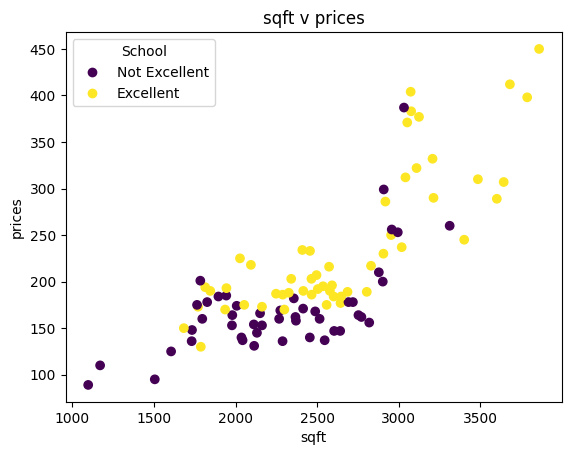

In [14]:
plt.title("sqft v prices")
plt.xlabel("sqft")
plt.ylabel("prices")
scatter = plt.scatter(sqft,prices, c = excellent)
plt.legend(handles = scatter.legend_elements()[0], labels = legend_names, title = "School")

* Scatterplot of price vs sqft shows a pretty linear relationship
* Smaller homes have smaller prices and larger homes have larger prices.
* Not excellent consistently below excellent
* For a house that is 2500sqft the average price of not excellent is about €160,000 and for the same size excellent was about €200,000

In [15]:
label = []
for i in range(len(region)):
    if region[i] == "East":
        label.append(0)
    elif region[i] == "South":
        label.append(1)
    elif region[i] == "North":
        label.append(2)
    else:
        label.append(3)
        
print(label)

[0, 0, 3, 1, 3, 1, 2, 3, 2, 3, 1, 1, 1, 2, 3, 2, 3, 1, 0, 2, 2, 0, 2, 1, 3, 3, 2, 0, 1, 0, 2, 1, 3, 1, 2, 3, 0, 2, 2, 0, 3, 3, 2, 0, 3, 1, 3, 1, 0, 1, 2, 0, 3, 1, 1, 3, 0, 0, 2, 3, 0, 1, 0, 3, 0, 0, 3, 0, 1, 0, 3, 1, 2, 1, 2, 1, 2, 0, 0, 0, 3, 2, 3, 3, 1, 1, 0, 0, 2, 1, 0, 3, 3, 3, 2, 1, 3, 1, 2, 2]


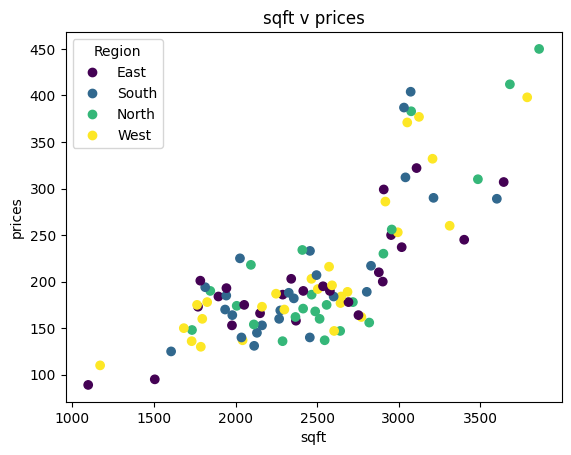

In [16]:
names = ["East", "South", "North", "West"]
plt.title("sqft v prices")
plt.xlabel("sqft")
plt.ylabel("prices")
scatter = plt.scatter(sqft,prices, c = label)
plt.legend(handles = scatter.legend_elements()[0], labels = names, title = "Region")

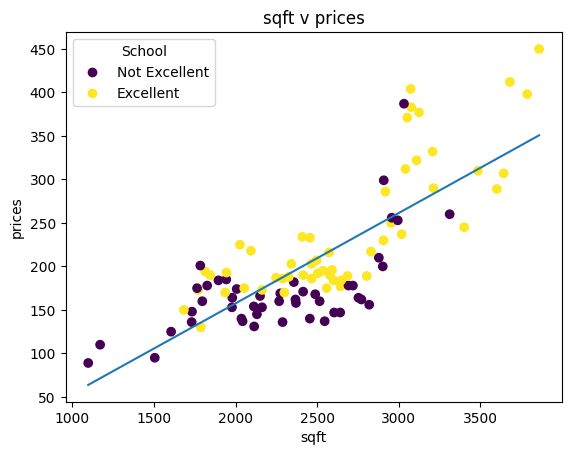

In [17]:
plt.title("sqft v prices")
plt.xlabel("sqft")
plt.ylabel("prices")
scatter = plt.scatter(sqft,prices, c = excellent)
plt.legend(handles = scatter.legend_elements()[0], labels = legend_names, title = "School")
plt.plot(np.unique(sqft), np.poly1d(np.polyfit(sqft, prices, 1))(np.unique(sqft)))

In [18]:
# Find sqft and price for all excellent and not excellent houses
ne_sqft = []
ne_prices = []
e_sqft = []
e_prices = []
for i in range(len(excellent)):
    if excellent[i] == 0:
        ne_sqft.append(sqft[i])
        ne_prices.append(prices[i])
    else:
        e_sqft.append(sqft[i])
        e_prices.append(prices[i])

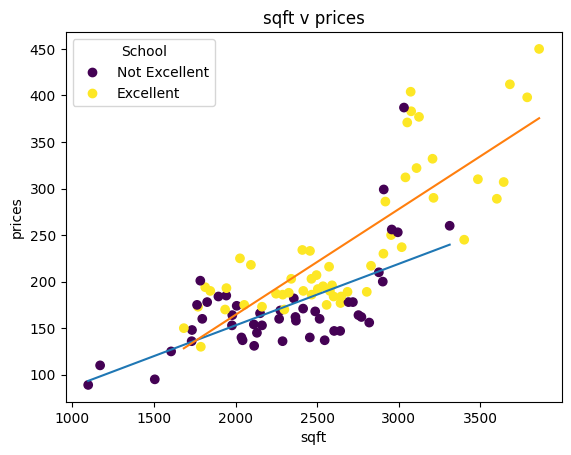

In [19]:
plt.title("sqft v prices")
plt.xlabel("sqft")
plt.ylabel("prices")
scatter = plt.scatter(sqft,prices, c = excellent)
plt.legend(handles = scatter.legend_elements()[0], labels = legend_names, title = "School")
plt.plot(np.unique(ne_sqft), np.poly1d(np.polyfit(ne_sqft, ne_prices, 1))(np.unique(ne_sqft)))
plt.plot(np.unique(e_sqft), np.poly1d(np.polyfit(e_sqft, e_prices, 1))(np.unique(e_sqft)))

In [20]:
east_sqft = []
east_prices = []
north_sqft = []
north_prices = []
south_sqft = []
south_prices = []
west_sqft = []
west_prices = []

for i in range(len(region)):
    if region[i] == "East":
        east_sqft.append(sqft[i])
        east_prices.append(prices[i])
    elif region[i] == "North":
        north_sqft.append(sqft[i])
        north_prices.append(prices[i])
    elif region[i] == "South":
        south_sqft.append(sqft[i])
        south_prices.append(prices[i])
    else:
        west_sqft.append(sqft[i])
        west_prices.append(prices[i])

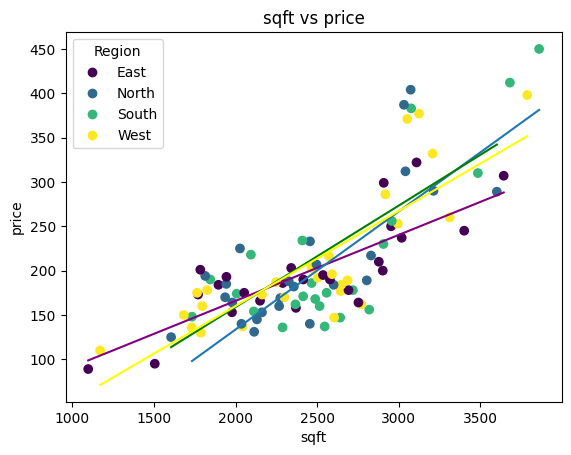

In [23]:
legend_names = ["East", "North", "South", "West"]
plt.title("sqft vs price")
plt.xlabel("sqft")
plt.ylabel("price")
scatter = plt.scatter(sqft, prices, c = label)
plt.plot(np.unique(east_sqft), np.poly1d(np.polyfit(east_sqft, east_prices, 1))(np.unique(east_sqft)), 'purple')
plt.plot(np.unique(north_sqft), np.poly1d(np.polyfit(north_sqft, north_prices, 1))(np.unique(north_sqft)), 'tab:blue')
plt.plot(np.unique(south_sqft), np.poly1d(np.polyfit(south_sqft, south_prices, 1))(np.unique(south_sqft)), 'green')
plt.plot(np.unique(west_sqft), np.poly1d(np.polyfit(west_sqft, west_prices, 1))(np.unique(west_sqft)), 'yellow')
plt.legend(handles = scatter.legend_elements()[0], labels=legend_names, title="Region")

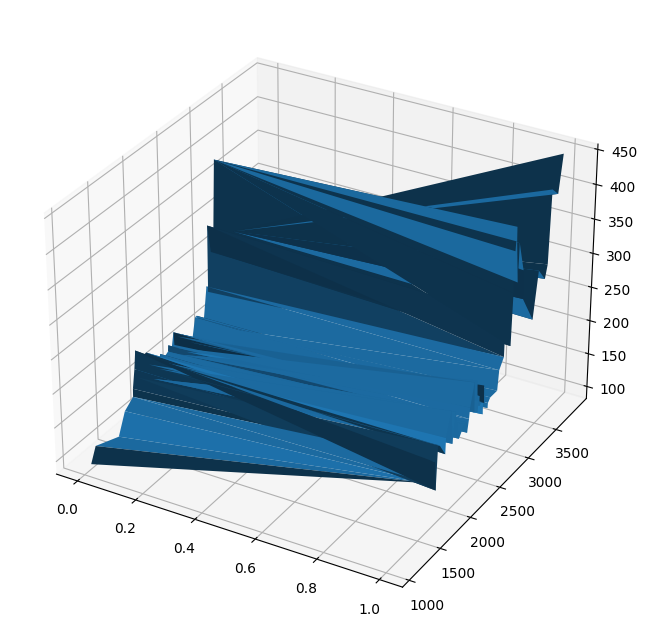

In [25]:
from mpl_toolkits import mplot3d
fig = plt.figure(figsize=(10,8))
ax = plt.axes(projection='3d')
x = np.array(excellent)
y = np.array(sqft)
z = np.array(prices)
ax.plot_trisurf(x, y, z, linewidth=0.2, antialiased=True)
plt.show()

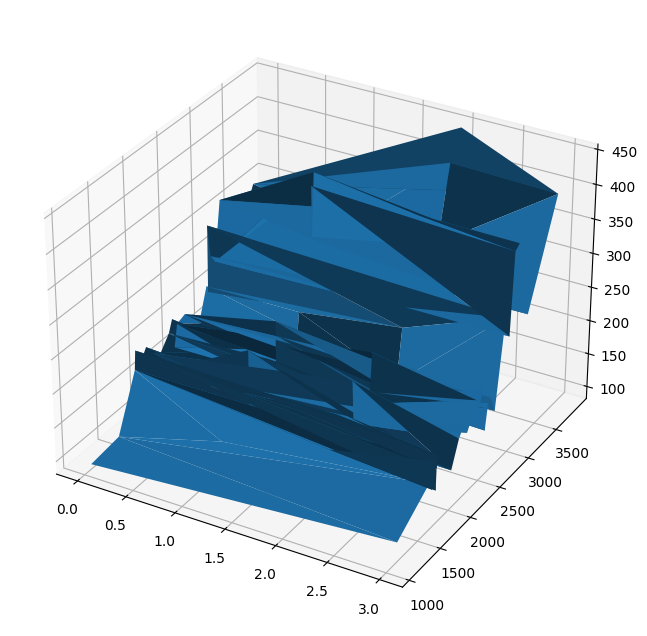

In [27]:
from mpl_toolkits import mplot3d
fig = plt.figure(figsize=(10,8))
ax = plt.axes(projection='3d')
x = np.array(label)
y = np.array(sqft)
z = np.array(prices)
ax.plot_trisurf(x, y, z, linewidth=0.2, antialiased=True)

plt.show()

In [28]:
# Refactor to use a lambda
# One hot encode the region variable
south = []
west = []
north = []
for i in range(len(region)):
    if region[i] == "South":
        south.append(1)
        west.append(0)
        north.append(0)
    elif region[i] == "West":
        south.append(0)
        west.append(1)
        north.append(0)
    elif region[i] == "North":
        south.append(0)
        west.append(0)
        north.append(1)
    else:
        south.append(0)
        west.append(0)
        north.append(0)

In [29]:
print(south)
print(len(south))
print(len(west))
print(len(north))

[0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0]
100
100
100


In [30]:
all_data = list(zip(sqft, excellent, south, west, north))
print(all_data)

[(1097, 0, 0, 0, 0), (1505, 0, 0, 0, 0), (1170, 0, 0, 1, 0), (1605, 0, 1, 0, 0), (1787, 1, 0, 1, 0), (2114, 0, 1, 0, 0), (2288, 0, 0, 0, 1), (1731, 0, 0, 1, 0), (2546, 0, 0, 0, 1), (2043, 0, 0, 1, 0), (2455, 0, 1, 0, 0), (2036, 0, 1, 0, 0), (2131, 0, 1, 0, 0), (2641, 0, 0, 0, 1), (2604, 0, 0, 1, 0), (1733, 0, 0, 0, 1), (1683, 1, 0, 1, 0), (2162, 0, 1, 0, 0), (1978, 0, 0, 0, 0), (2112, 0, 0, 0, 1), (2819, 0, 0, 0, 1), (2370, 0, 0, 0, 0), (2515, 0, 0, 0, 1), (2267, 0, 1, 0, 0), (1796, 0, 0, 1, 0), (2771, 0, 0, 1, 0), (2367, 0, 0, 0, 1), (2753, 0, 0, 0, 0), (1980, 0, 1, 0, 0), (2150, 0, 0, 0, 0), (2488, 0, 0, 0, 1), (2274, 0, 1, 0, 0), (2299, 1, 0, 1, 0), (1936, 1, 1, 0, 0), (2414, 0, 0, 0, 1), (2162, 1, 0, 1, 0), (1770, 1, 0, 0, 0), (2007, 0, 0, 0, 1), (2558, 1, 0, 0, 1), (2053, 1, 0, 0, 0), (1764, 0, 0, 1, 0), (2643, 1, 0, 1, 0), (2719, 0, 0, 0, 1), (2692, 0, 0, 0, 0), (1826, 0, 0, 1, 0), (2357, 0, 1, 0, 0), (2647, 1, 0, 1, 0), (2601, 1, 1, 0, 0), (1895, 0, 0, 0, 0), (1943, 0, 1, 0, 0),

In [32]:
all_data = sm.add_constant(all_data)
model = sm.OLS(prices, all_data)
result = model.fit()
print(result.summary())
# Line below is for the standard error
print(result.scale**0.5)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.651
Model:                            OLS   Adj. R-squared:                  0.633
Method:                 Least Squares   F-statistic:                     35.11
Date:                Mon, 12 Feb 2024   Prob (F-statistic):           4.25e-20
Time:                        11:34:56   Log-Likelihood:                -520.10
No. Observations:                 100   AIC:                             1052.
Df Residuals:                      94   BIC:                             1068.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -48.0755     22.063     -2.179      0.0